In [51]:
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### This dummy function is basically saying that of there are half as many males as females then the code will likely be true half of the time. If this dummy code doesnt perform better than our more complex code then we must be doing something wrong.

In [90]:
def dummyGender(imagesArray):
    predGenDumm = []
    for _ in range(len(imagesArray)):
        
        x = np.random.randint(0, 2)
        
        predGenDumm.append(x)
        
    return predGenDumm 

In [77]:
options = np.arange(1,10)
p1 = [[.22], .19, [], [.12],[.11],[.07], [0.05], 0.04, [0.04]
sum(p1)
p = [.16, .07, 0.05,0.04,.11,.22, .12,  .19, 0.04]

1.0000000000000002

In [ ]:
6    2015
8    1866
1    1586
7    1213
5    1118
2     724
3     476
9     417
4     362
if x ==1:
            predictAgeDumm.append(x)
        if x == 2:
        #could be any age in that range (second largest)
            randomAge = np.random.randint(2, 5)
            predictAgeDumm.append(randomAge)
        if x == 3:
            randomAge = np.random.randint(20, 41)
            predictAgeDumm.append(randomAge)
        if x ==4:
            randomAge = np.random.randint(60, 85)
            predictAgeDumm.append(randomAge

#### There are a lot of todlers in our data set. They are in fact one of the largers sets in the images followed by teenagers and adults. Elderly people are not there that often that this dummy model will skip them all together.

In [82]:
def dummyAge(imagesArray):
    predictAgeDumm = []
    options = np.arange(1,10)
    for _ in range(len(imagesArray)):
        x = np.random.choice(options, p = [.16, .07, 0.05,0.04,.11,.22, .12,  .19, 0.04])
        #this would mean the img is a 1 yo (majority)
        predictAgeDumm.append(x)
    return predictAgeDumm 

In [ ]:
6    0.039695
8    0.036760
1    0.031244
7    0.023896
5    0.022024
2    0.014263
3    0.009377
9    0.008215
4    0.007131

In [98]:

def dummyRace(imagesArray):
    predictRaceDumm = []
    options = [1, 2, 3, 4]
    for _ in range(len(imagesArray)):
        x =np.random.choice(options, p = [.55, .1, .18, .17,] )
        predictRaceDumm.append(x)
    return predictRaceDumm   

In [32]:
"""Labels and images collector"""
import os
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
mypath = "/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Machine_learning_code/crop_part1/"
 
#mypath = '/Users/jenifervivar/Desktop/crop_part1/'#'./Data/CroppedImages'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)
filedfnona = filedf.dropna()
filedfnona['age']  = filedfnona['age'].astype(int)
filedfnona['race'] = filedfnona['race'].astype(int)
filedfnona['gender'] = filedfnona['gender'].astype(int)

#path = '/Users/jenifervivar/Desktop/UTKface_inthewild/part3'
#listing = os.listdir(mypath) 
images = []
for img in filedfnona['file']:
    image = plt.imread(mypath + img)
    #image = rgb2gray(image)
    images.append(image)

In [45]:
len(images)

9777

In [ ]:
#1 infancy (0-2)
#2 Early Childhood (Ages 3-5)
#3 Middle Childhood (Ages 6-8)
#4 Late Childhood (Ages 9-11)
#5 Adolescence (Ages 12-20)
#6 Early Adulthood (Ages 21-35)
#7 Midlife (Ages 36-50)
#8 Mature Adulthood (Ages 51-79)
#9 Late Adulthood (Age 80+)

In [33]:
balanced = filedfnona

In [34]:
balanced['age']=np.where((balanced.age==2), 1, balanced.age)

In [35]:
balanced['age']=np.where(((balanced.age>=3) & (balanced.age<6)), 2, balanced.age)

In [36]:
balanced['age']=np.where(((balanced.age>=6) & (balanced.age<9)), 3, balanced.age)


In [37]:
balanced['age']=np.where(((balanced.age>=9) & (balanced.age<12)), 4, balanced.age)


In [38]:
balanced['age']=np.where(((balanced.age>=12) & (balanced.age<21)), 5, balanced.age)


In [39]:
balanced['age']=np.where(((balanced.age>=21) & (balanced.age<36)), 6, balanced.age)


In [40]:
balanced['age']=np.where(((balanced.age>=36) & (balanced.age<51)), 7, balanced.age)


In [41]:
balanced['age']=np.where(((balanced.age>=51) & (balanced.age<80)), 8, balanced.age)


In [42]:
balanced['age']=np.where((balanced.age>=80), 9, balanced.age)

In [71]:
balanced['age'].value_counts()

6    2015
8    1866
1    1586
7    1213
5    1118
2     724
3     476
9     417
4     362
Name: age, dtype: int64

In [44]:
len(balanced['age'])

9777

In [53]:
balanced['race'].value_counts()

0    5264
2    1553
3    1452
4    1103
1     405
Name: race, dtype: int64

In [54]:
balanced['gender'].value_counts()

1    5406
0    4371
Name: gender, dtype: int64

In [92]:
ydummy_Gender = dummyGender(images)
y_dummy_race = dummyRace(images)
y_dummy_age = dummyAge(images)

In [93]:
def confusion_plot(y_test, y_pred, title, labelsx, labelsy):
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, fmt = 'd', cmap='Blues')

    ax.set_title(title);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(labelsx)
    ax.yaxis.set_ticklabels(labelsy)

## Display the visualization of the Confusion Matrix.
    plt.show()

In [94]:
dummy_gr_score = accuracy_score(balanced['gender'],ydummy_Gender)
dummy_rc_score  = accuracy_score(balanced['race'],y_dummy_race)
dumy_age_score = accuracy_score(balanced['age'],y_dummy_age)

In [101]:
print("       Classififcation Report of Dummy Model on Gender")
print("  ")
print(classification_report(balanced['gender'],ydummy_Gender))


       Classififcation Report of Dummy Model on Gender
  
              precision    recall  f1-score   support

           0       0.45      0.51      0.48      4371
           1       0.56      0.50      0.53      5406

    accuracy                           0.51      9777
   macro avg       0.51      0.51      0.50      9777
weighted avg       0.51      0.51      0.51      9777



In [102]:
print("       Classififcation Report of Dummy Model on Race")
print("  ")
print(classification_report(balanced['race'],y_dummy_race))

       Classififcation Report of Dummy Model on Race
  
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5264
           1       0.04      0.53      0.07       405
           2       0.16      0.10      0.13      1553
           3       0.14      0.17      0.15      1452
           4       0.09      0.15      0.11      1103

    accuracy                           0.08      9777
   macro avg       0.09      0.19      0.09      9777
weighted avg       0.06      0.08      0.06      9777



/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [103]:
print("       Classififcation Report of Dummy Model on Age")
print("  ")
print(classification_report(balanced['age'],y_dummy_age))

       Classififcation Report of Dummy Model on Age
  
              precision    recall  f1-score   support

           1       0.16      0.16      0.16      1586
           2       0.06      0.06      0.06       724
           3       0.04      0.04      0.04       476
           4       0.03      0.04      0.04       362
           5       0.11      0.11      0.11      1118
           6       0.20      0.22      0.21      2015
           7       0.12      0.11      0.11      1213
           8       0.20      0.20      0.20      1866
           9       0.03      0.03      0.03       417

    accuracy                           0.14      9777
   macro avg       0.11      0.11      0.11      9777
weighted avg       0.14      0.14      0.14      9777



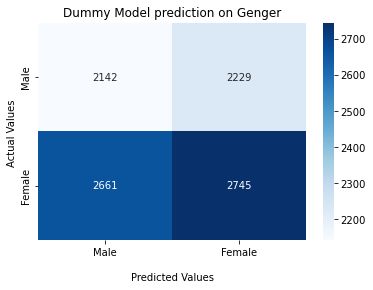

In [57]:
x = ["Male", "Female"]
confusion_plot(balanced['gender'],ydummy_Gender, "Dummy Model prediction on Genger",x,x )

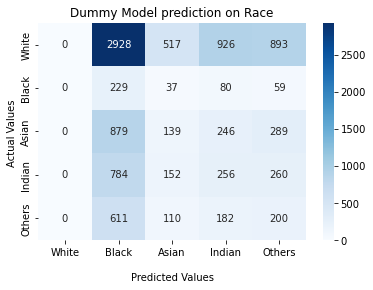

In [58]:
x = ["White", "Black", "Asian", "Indian", "Others"]

confusion_plot(balanced['race'],y_dummy_race, "Dummy Model prediction on Race",x,x )

ValueError: The number of FixedLocator locations (19), usually from a call to set_ticks, does not match the number of ticklabels (9).

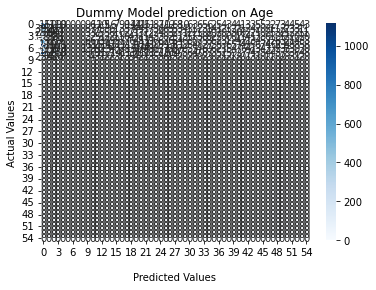

In [60]:
x =[ "infancy(0-2)","Early Childhood(Ages 3-5)","Middle Childhood (Ages 6-8)","Late Childhood (Ages 9-11)",\
   "Adolescence (Ages 12-20)","Early Adulthood (Ages 21-35)","Midlife (Ages 36-50)",\
    "Mature Adulthood (Ages 51-79)","Late Adulthood (Age 80+)"]

#5 Adolescence (Ages 12-20)
#6 Early Adulthood (Ages 21-35)
#7 Midlife (Ages 36-50)
#8 Mature Adulthood (Ages 51-79)
#9 Late Adulthood (Age 80+)

confusion_plot(balanced['age'],y_dummy_age, "Dummy Model prediction on Age",x,x )